In [1]:
#Importing numpy as np
import numpy as np
#Importing Pandas
import pandas as pd
#Plotting capability
import matplotlib.pylab as plt
# Functionality for computing features
from pyspark.ml import feature

# Object for creating sequences of transformations
from pyspark.ml import Pipeline
# Load functionality to manipulate dataframes
from pyspark.sql import functions as fn

# import packages
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext.setSystemProperty('spark.executor.memory', '512g')

In [3]:
df=pd.read_csv("Data1.csv")
data = spark.createDataFrame(df)

# Visualization

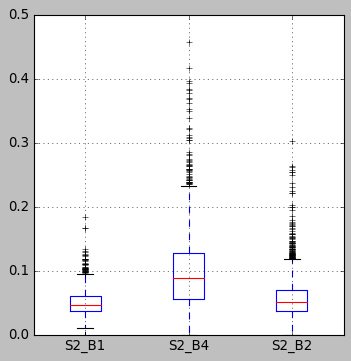

In [4]:
plt.style.use('classic')
fig, ax = plt.subplots(figsize=(5,  5))
df.boxplot(['S2_B1','S2_B4','S2_B2'])
fig.savefig('boxplot_features_1.png', dpi=400, bbox_inches='tight')

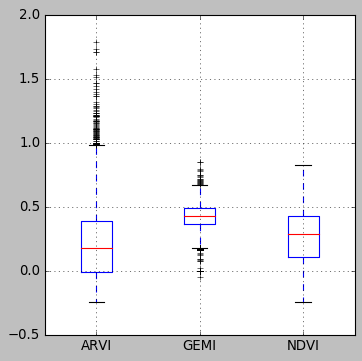

In [5]:
plt.style.use('classic')
fig, ax = plt.subplots(figsize=(5,  5))
df.boxplot(['ARVI','GEMI','NDVI'])
fig.savefig('boxplot_features_2.png', dpi=400, bbox_inches='tight')

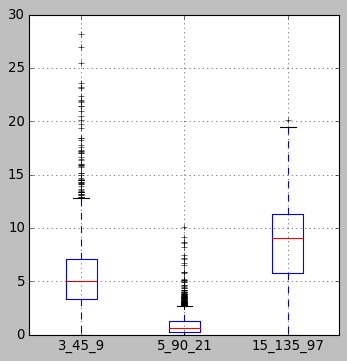

In [6]:
plt.style.use('classic')
fig, ax = plt.subplots(figsize=(5,  5))
df.boxplot(['3_45_9','5_90_21','15_135_97'])
fig.savefig('boxplot_features_3.png', dpi=400, bbox_inches='tight')

# Radom Forest Classifier

In [7]:
va = VectorAssembler(inputCols= ["S2_B1", "S2_B2", "S2_B4", "S2_B11", "S2_B12", "ARVI", "CI", "DVI", "GEMI", "GNDVI", "IPVI", "IRECI", "MCARI", "MSAVI", "MSAVI2", "NDVI", "NDWI2", "PSSRA", "RI", "RVI", "SAVI", "3_45_9", "3_90_12", "3_90_63", "5_90_21", "5_90_62", "7_90_15", "7_45_19", "9_180_12", "9_45_97", "9_90_11", "9_90_59", "11_135_1", "13_90_59", "15_135_97", "15_45_1", "15_45_19", "15_45_59", "15_45_81", "15_90_13", "15_90_31", "15_90_59", "15_90_64", "15_180_59"]
, outputCol="features")

In [7]:
#["S2_B1", "S2_B2", "S2_B4", "S2_B11", "S2_B12", "ARVI", "CI", "DVI", "GEMI", "GNDVI", "IPVI", "IRECI", "MCARI", "MSAVI", "MSAVI2", "NDVI", "NDWI2", "PSSRA", "RI", "RVI", "SAVI", "3_45_9", "3_90_12", "3_90_63", "5_90_21", "5_90_62", "7_90_15", "7_45_19", "9_180_12", "9_45_97", "9_90_11", "9_90_59", "11_135_1", "13_90_59", "15_135_97", "15_45_1", "15_45_19", "15_45_59", "15_45_81", "15_90_13", "15_90_31", "15_90_59", "15_90_64", "15_180_59"]

In [8]:
training_df, validation_df, testing_df = data.randomSplit([0.8, 0.1, 0.1], seed = 100 )

In [9]:
classification_evaluator = MulticlassClassificationEvaluator(labelCol='Class-label')
classification_evaluator_Acc = MulticlassClassificationEvaluator(labelCol='Class-label',predictionCol="prediction", metricName="accuracy")

In [10]:
rf_estimator1 = RandomForestClassifier(featuresCol='features',labelCol='Class-label',numTrees = 10, maxDepth = 5)
rf_estimator11 = RandomForestClassifier(featuresCol='features',labelCol='Class-label')

pipeline_rf1 = Pipeline(stages=[va, rf_estimator1])
pipeline_rf11 = Pipeline(stages=[va, rf_estimator11])

pipeline_rf_model1 = pipeline_rf1.fit(training_df)
pipeline_rf_model11 = pipeline_rf1.fit(training_df)

In [11]:
AUC_model1 = classification_evaluator.evaluate(pipeline_rf_model1.transform(validation_df))
AUC_model11 = classification_evaluator.evaluate(pipeline_rf_model11.transform(validation_df))

print(AUC_model1, AUC_model11)

0.5795060182949958 0.5795060182949958


In [15]:
rf_model1 = pipeline_rf_model1.stages[-1]
feature_importance1 = pd.DataFrame(list(zip(training_df.columns[0:], rf_model1.featureImportances.toArray())),
            columns = ['feature', 'importance']).sort_values('importance', ascending=False)
feature_importance1

,feature,importance
41,15_90_59,0.091283
15,NDVI,0.073061
39,15_90_13,0.053241
34,15_135_97,0.052449
5,ARVI,0.050390
9,GNDVI,0.046837
20,SAVI,0.042911
33,13_90_59,0.040149
42,15_90_64,0.034602
21,3_45_9,0.032264


In [12]:
predictions1 = pipeline_rf_model1.transform(testing_df)

In [13]:
predictions1.select("prediction", "Class-label", "features").show(5)

+----------+-----------+--------------------+
|prediction|Class-label|            features|
+----------+-----------+--------------------+
|       1.0|          1|          (44,[],[])|
|       1.0|         10|          (44,[],[])|
|       1.0|          1|[0.0306,0.0288,0....|
|       1.0|          1|[0.0317,0.0263,0....|
|       1.0|          1|[0.0327,0.0289999...|
+----------+-----------+--------------------+
only showing top 5 rows



In [18]:
accuracy1 = classification_evaluator_Acc.evaluate(predictions1)
print("Accuracy of RF Model 1 = %g " % accuracy1)
AUC_rf1 = classification_evaluator.evaluate(pipeline_rf_model1.transform(testing_df))
print("Area Under Curve of RF Model 1 = %g " % AUC_rf1)

Accuracy of RF Model 1 = 0.575163 
Area Under Curve of RF Model 1 = 0.541291 


In [17]:
rf_estimator2 = RandomForestClassifier(featuresCol='features',labelCol='Class-label',numTrees=100, maxDepth=15)
pipeline_rf2 = Pipeline(stages=[va, rf_estimator2])
pipeline_rf_model2 = pipeline_rf2.fit(training_df)

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1159, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 985, in send_command
    response = connection.send_command(command)
  File "/usr/local/spark/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1164, in send_command
    "Error while receiving", e, proto.ERROR_ON_RECEIVE)
py4j.protocol.Py4JNetworkError: Error while receiving


Py4JError: org does not exist in the JVM

In [18]:
classification_evaluator.evaluate(pipeline_rf_model2.transform(validation_df))

NameError: name 'pipeline_rf_model2' is not defined

In [16]:
rf_model2 = pipeline_rf_model2.stages[-1]
feature_importance2 = pd.DataFrame(list(zip(training_df.columns[0:], rf_model2.featureImportances.toArray())),
            columns = ['feature', 'importance']).sort_values('importance', ascending=False)
feature_importance2

,feature,importance
5,ARVI,0.043151
10,IPVI,0.042584
19,RVI,0.035737
3,S2_B11,0.034268
6,CI,0.030234
4,S2_B12,0.029862
29,9_45_97,0.029690
0,S2_B1,0.029584
17,PSSRA,0.028396
30,9_90_11,0.027953


In [17]:
predictions2 = pipeline_rf_model2.transform(testing_df)
predictions2.select("prediction", "Class-label", "features").show(5)

+----------+-----+--------------------+
|prediction|Label|            features|
+----------+-----+--------------------+
|       1.0|    1|          (44,[],[])|
|       1.0|    6|          (44,[],[])|
|       1.0|    1|[0.0306,0.0288,0....|
|       1.0|    1|[0.0317,0.0263,0....|
|       1.0|    1|[0.0327,0.0289999...|
+----------+-----+--------------------+
only showing top 5 rows



In [18]:
accuracy2 = classification_evaluator_Acc.evaluate(predictions2)
print("Accuracy of RF Model 2 = %g " % accuracy2)
AUC_rf2 = classification_evaluator.evaluate(pipeline_rf_model2.transform(testing_df))
print("Area Under Curve of RF Model 2 = %g " % AUC_rf2)

Accuracy of RF Model 2 = 0.705882 
Area Under Curve of RF Model 2 = 0.697399 


In [20]:
rf_estimator3 = RandomForestClassifier(featuresCol='features',labelCol='Class-label',numTrees=200,maxDepth=5)
pipeline_rf3 = Pipeline(stages=[va, rf_estimator3])
pipeline_rf_model3 = pipeline_rf3.fit(training_df)

In [21]:
classification_evaluator.evaluate(pipeline_rf_model3.transform(validation_df))

0.7165209608272808

In [22]:
rf_model3 = pipeline_rf_model3.stages[-1]
feature_importance3 = pd.DataFrame(list(zip(training_df.columns[0:], rf_model3.featureImportances.toArray())),
            columns = ['feature', 'importance']).sort_values('importance', ascending=False)
feature_importance3

,feature,importance
10,IPVI,0.062445
5,ARVI,0.053432
15,NDVI,0.047937
19,RVI,0.045647
9,GNDVI,0.042843
3,S2_B11,0.037617
16,NDWI2,0.037348
4,S2_B12,0.034106
20,SAVI,0.033767
2,S2_B4,0.032947


In [23]:
predictions3 = pipeline_rf_model3.transform(testing_df)
predictions3.select("prediction", "Class-label", "features").show(5)

+----------+-----+--------------------+
|prediction|Label|            features|
+----------+-----+--------------------+
|       1.0|    1|          (44,[],[])|
|       1.0|    6|          (44,[],[])|
|       1.0|    1|[0.0306,0.0288,0....|
|       1.0|    1|[0.0317,0.0263,0....|
|       1.0|    1|[0.0327,0.0289999...|
+----------+-----+--------------------+
only showing top 5 rows



In [24]:
accuracy3 = classification_evaluator_Acc.evaluate(predictions3)
print("Accuracy of RF Model 3 = %g " % accuracy3)
AUC_rf3 = classification_evaluator.evaluate(pipeline_rf_model3.transform(testing_df))
print("Area Under Curve of RF Model 3 = %g " % AUC_rf3)

Accuracy of RF Model 3 = 0.705882 
Area Under Curve of RF Model 3 = 0.676074 


In [25]:
best_rf_model = pipeline_rf_model2

In [26]:
classification_evaluator_Precision = MulticlassClassificationEvaluator(labelCol='Class-label',predictionCol="prediction", metricName="weightedPrecision")
classification_evaluator_Recall = MulticlassClassificationEvaluator(labelCol='Class-label',predictionCol="prediction", metricName="weightedRecall")
classification_evaluator_F1 = MulticlassClassificationEvaluator(labelCol='Class-label',predictionCol="prediction", metricName="f1")

In [27]:
accuracy_rf_best = classification_evaluator_Acc.evaluate(predictions2)
print("Accuracy of Best RF Model = %g " % accuracy_rf_best)
AUC_rf_best = classification_evaluator.evaluate(pipeline_rf_model2.transform(testing_df))
print("Area Under Curve of Best RF Model = %g " % AUC_rf_best)
precision_rf_best = classification_evaluator_Precision.evaluate(predictions2)
print("Precision of Best RF Model = %g " % (1.0 - precision_rf_best))
recall_rf_best = classification_evaluator_Recall.evaluate(predictions2)
print("Recall of Best RF Model = %g " % recall_rf_best)
f1_score_best = classification_evaluator_F1.evaluate(predictions2)
print("F1 score of Best RF Model = %g " % f1_score_best)

Accuracy of Best RF Model = 0.705882 
Area Under Curve of Best RF Model = 0.697399 
Precision of Best RF Model = 0.30314 
Recall of Best RF Model = 0.705882 
F1 score of Best RF Model = 0.697399 


Kappa Co-efficient = Po- Pe/1-Pe where Observed Agreement is equivalent to Accuracy and Pe is the expected agreement based on randomly agreeing to what land mass it is classified to. 

Therefore, k = 0.72-0.3/1-0.3 = 0.6.

In [27]:
# running 100 iteration to report best generalization performance
### Best RF model refitted with 90% of data and tested on 10% of data
#AUCs = []
#for i in range(0,100):
#    training_df, testing_df = data.randomSplit([0.9, 0.1], seed = i )
#    best_rf_modelX = pipeline_rf2.fit(training_df)
#    AUC_rf_bestX = classification_evaluator.evaluate(best_rf_modelX.transform(testing_df))
#    AUCs.append(AUC_rf_bestX)
    
##### ONLY RUN ONCE TO TEST AND VISUALIZE - this process takes some time.

In [32]:
#### Generalization performance results from previous step
#training_df, testing_df = data.randomSplit([0.9, 0.1], seed = i )
#best_rf_modelX = pipeline_rf2.fit(training_df)
#AUC_rf_bestX = classification_evaluator.evaluate(best_rf_modelX.transform(testing_df))
    
#generalization_AUC = sum(AUCs)/len(AUCs)

#print('maximum AUC = ', max(AUCs))
#print('minimum AUC = ', min(AUCs))
#print('generalization AUC (mean of AUCs) = ', generalization_AUC)

maximum AUC =  0.7953634540329618
minimum AUC =  0.7023372602484644
generalization AUC (mean of AUCs) =  0.7520640874603284


# Apply the best model to larger datasets

In [ ]:
df=pd.read_csv(filepath+"sub1.csv")
dfsplit=np.array_split(df,100)

data=spark.createDataFrame(dfsplit[0])
prediction = best_rf_model.transform(data)
df=pd.DataFrame(predictions.select('prediction','class-label'),columns=['prediction','class-label'])
df.to_csv('output.csv',mode='w')

for i in range(1,100):
    data=spark.createDataFrame(dfsplit[i])
    prediction = best_rf_model.transform(data)
    df=pd.DataFrame(predictions.select('prediction','class-label'),columns=['prediction','class-label'])
    df.to_csv('output.csv',mode='a',header=None)

# Logisitic Regression

In [25]:
lr =LogisticRegression().\
    setLabelCol('Class-label').\
    setFeaturesCol('features').\
    setRegParam(0.1).\
    setMaxIter(100).\
    setElasticNetParam(0.01)

In [26]:
pipeline_lr1 = Pipeline(stages=[va,lr])
pipeline_lr1_model = pipeline_lr1.fit(training_df)

In [27]:
classification_evaluator.evaluate(pipeline_lr1_model.transform(validation_df))

0.6807109967127912

In [28]:
AUC_lr1 = classification_evaluator.evaluate(pipeline_lr1_model.transform(testing_df))
print(AUC_lr1)

0.6787780579877075


In [29]:
predictions1 = pipeline_lr1_model.transform(testing_df)
predictions1.select("prediction", "Class-label", "features").show(5)
accuracy1 = classification_evaluator_Acc.evaluate(predictions1)
print("Test Error = %g " % (1.0 - accuracy1))

+----------+-----------+--------------------+
|prediction|Class-label|            features|
+----------+-----------+--------------------+
|       1.0|          1|          (44,[],[])|
|       1.0|          6|          (44,[],[])|
|       1.0|          1|[0.0306,0.0288,0....|
|       1.0|          1|[0.0317,0.0263,0....|
|       1.0|          1|[0.0327,0.0289999...|
+----------+-----------+--------------------+
only showing top 5 rows

Test Error = 0.294118 


In [30]:
va2 = VectorAssembler(inputCols= ["ARVI", "CI", "DVI", "GEMI", "GNDVI", "IPVI", "IRECI", "MCARI", "MSAVI", "MSAVI2", "NDVI", "NDWI2", "PSSRA", "RI", "RVI", "SAVI"],
        outputCol="features") 

In [31]:
pipeline_lr2 = Pipeline(stages=[va2,lr])
pipeline_lr2_model = pipeline_lr2.fit(training_df)

In [32]:
classification_evaluator.evaluate(pipeline_lr2_model.transform(validation_df))

0.5146294486488721

In [33]:
AUC_lr2 = classification_evaluator.evaluate(pipeline_lr2_model.transform(testing_df))
print(AUC_lr2)

0.5460043696859141


In [34]:
predictions2 = pipeline_lr2_model.transform(testing_df)
predictions2.select("prediction", "Class-label", "features").show(5)
accuracy2 = classification_evaluator_Acc.evaluate(predictions2)
print("Test Error = %g " % (1.0 - accuracy2))

+----------+-----------+--------------------+
|prediction|Class-label|            features|
+----------+-----------+--------------------+
|       3.0|          1|          (16,[],[])|
|       3.0|          6|          (16,[],[])|
|       1.0|          1|[1.71111,-0.12028...|
|       1.0|          1|[0.80392,-0.05119...|
|       1.0|          1|[0.70526,-0.07017...|
+----------+-----------+--------------------+
only showing top 5 rows

Test Error = 0.379085 


In [35]:
va3 = VectorAssembler(inputCols= ["3_45_9", "3_90_12", "3_90_63", "5_90_21", "5_90_62", "7_90_15", "7_45_19", "9_180_12", "9_45_97", "9_90_11", "9_90_59", "11_135_1", "13_90_59", "15_135_97", "15_45_1", "15_45_19", "15_45_59", "15_45_81", "15_90_13", "15_90_31", "15_90_59", "15_90_64", "15_180_59"]
, outputCol="features")
pipeline_lr3 = Pipeline(stages=[va3,lr])
pipeline_lr3_model = pipeline_lr3.fit(training_df)

In [36]:
classification_evaluator.evaluate(pipeline_lr3_model.transform(validation_df))

0.572819213211094

In [37]:
AUC_lr3 = classification_evaluator.evaluate(pipeline_lr3_model.transform(testing_df))
print(AUC_lr3)

0.5483782441001429


In [38]:
predictions3 = pipeline_lr3_model.transform(testing_df)
predictions3.select("prediction", "Class-label", "features").show(5)
accuracy3 = classification_evaluator_Acc.evaluate(predictions3)
print("Test Error = %g " % (1.0 - accuracy3))

+----------+-----------+--------------------+
|prediction|Class-label|            features|
+----------+-----------+--------------------+
|       7.0|          1|          (23,[],[])|
|       7.0|          6|          (23,[],[])|
|       1.0|          1|[2.0,0.0,1.0,0.0,...|
|       1.0|          1|[2.0,0.0,1.0,0.0,...|
|       1.0|          1|[2.0,0.0,1.0,0.0,...|
+----------+-----------+--------------------+
only showing top 5 rows

Test Error = 0.405229 


First LR model is good compared to the other models as we have better accuracy for the first model. Also accuracy is good whe we use all the features in the image and not just specific set of features

Setting various parameters for the first LR model where all the features are considered and running on the validation and testing datasets

In [39]:
from pyspark.ml.classification import LogisticRegression
alpha1 = 0
alpha2 = 0.2
alpha3 = 0.4
lambda1 = 0
lambda2 = 0.02
lambda3 = 0.1
en_lr1 = LogisticRegression().\
        setLabelCol('Class-label').\
        setFeaturesCol('features').\
        setRegParam(lambda1).\
        setMaxIter(100).\
        setElasticNetParam(alpha1)
        
en_lr2 = LogisticRegression().\
        setLabelCol('Class-label').\
        setFeaturesCol('features').\
        setRegParam(lambda2).\
        setMaxIter(100).\
        setElasticNetParam(alpha2)
        
en_lr3 = LogisticRegression().\
        setLabelCol('Class-label').\
        setFeaturesCol('features').\
        setRegParam(lambda3).\
        setMaxIter(100).\
        setElasticNetParam(alpha3)
lr_pipeline1_test = Pipeline(stages=[va, en_lr1])
lr_pipeline2_test = Pipeline(stages=[va, en_lr2])
lr_pipeline3_test = Pipeline(stages=[va, en_lr3])
lr_pipeline1 = lr_pipeline1_test.fit(training_df)
lr_pipeline2 = lr_pipeline2_test.fit(training_df)
lr_pipeline3 = lr_pipeline3_test.fit(training_df)

In [40]:
classification_evaluator.evaluate(lr_pipeline1.transform(validation_df))

0.7507143202439243

In [41]:
accuracy1 = classification_evaluator_Acc.evaluate(lr_pipeline1.transform(testing_df))
accuracy1

0.7189542483660131

In [42]:
AUC1 = classification_evaluator.evaluate(lr_pipeline1.transform(testing_df))
AUC1

0.7133087736584662

In [43]:
classification_evaluator.evaluate(lr_pipeline2.transform(validation_df))

0.7127857219333914

In [44]:
accuracy2 = classification_evaluator_Acc.evaluate(lr_pipeline2.transform(testing_df))
accuracy2

0.7124183006535948

In [45]:
AUC2 = classification_evaluator.evaluate(lr_pipeline2.transform(testing_df))
AUC2

0.6955220558502954

In [46]:
classification_evaluator.evaluate(lr_pipeline3.transform(validation_df))

0.5308857781552391

In [47]:
accuracy3 = classification_evaluator_Acc.evaluate(lr_pipeline3.transform(testing_df))
accuracy3

0.6470588235294118

In [48]:
AUC3 = classification_evaluator.evaluate(lr_pipeline3.transform(testing_df))
AUC3

0.5687670664390785

In [49]:
classification_evaluator_Precision = MulticlassClassificationEvaluator(labelCol='Class-label',predictionCol="prediction", metricName="weightedPrecision")
classification_evaluator_Recall = MulticlassClassificationEvaluator(labelCol='Class-label',predictionCol="prediction", metricName="weightedRecall")
classification_evaluator_F1 = MulticlassClassificationEvaluator(labelCol='Class-label',predictionCol="prediction", metricName="f1")

In [50]:
predictions_best = lr_pipeline1.transform(testing_df)
predictions_best.select("prediction", "Class-label", "features").show(5)

+----------+-----------+--------------------+
|prediction|Class-label|            features|
+----------+-----------+--------------------+
|       7.0|          1|          (44,[],[])|
|       7.0|          6|          (44,[],[])|
|       1.0|          1|[0.0306,0.0288,0....|
|       1.0|          1|[0.0317,0.0263,0....|
|       1.0|          1|[0.0327,0.0289999...|
+----------+-----------+--------------------+
only showing top 5 rows



In [51]:
accuracy_lr_best = classification_evaluator_Acc.evaluate(predictions_best)
print("Accuracy of Best LR Model = %g " % accuracy_lr_best)
AUC_lr_best = classification_evaluator.evaluate(lr_pipeline1.transform(testing_df))
print("Area Under Curve of Best LR Model = %g " % AUC_lr_best)
precision_lr_best = classification_evaluator_Precision.evaluate(predictions_best)
print("Precision of Best LR Model = %g " % (1.0 - precision_lr_best))
recall_lr_best = classification_evaluator_Recall.evaluate(predictions_best)
print("Recall of Best LR Model = %g " % recall_lr_best)
f1_score_best = classification_evaluator_F1.evaluate(predictions_best)
print("F1 score of Best LR Model = %g " % f1_score_best)

Accuracy of Best LR Model = 0.718954 
Area Under Curve of Best LR Model = 0.713309 
Precision of Best LR Model = 0.28264 
Recall of Best LR Model = 0.718954 
F1 score of Best LR Model = 0.713309 


Kappa Co-efficient = Po- Pe/1-Pe where Observed Agreement is equivalent to Accuracy and Pe is the expected agreement based on randomly agreeing to what land mass it is classified to. 

Therefore, k = 0.72-0.28/1-0.28 = 0.61.